<a href="https://colab.research.google.com/github/Harshini-19-git/projects/blob/main/ANN%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/datasets/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#!pip install tensorflow-gpu

In [6]:
#pip install tensorflow==2.12.0


In [40]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.shape

(10000, 14)

Divide the dataset into independent-X(i.p ) and dependent(o/p) features

In [11]:
X=df.iloc[:,3:13]# 3 to 13 th col (13 excluded)
y=df.iloc[:,13] #(only 13 th col with all rows)

In [12]:
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


In [13]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


handling the categorical features---Feature engineering


*  One hot encoding
*   List item



In [14]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [15]:
geogrphy=pd.get_dummies(X['Geography'],drop_first=True)# if both germany and spain=0 ==> its france

In [16]:
gender=pd.get_dummies(X['Gender'],drop_first=True)
gender


,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


concatenate these variables in the data frame..by dropping the original one

In [17]:
X=X.drop(['Geography','Gender'],axis=1)#axis=1 ..no need to drop the rows..just drop the columns

In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [19]:
X=pd.concat([X,geogrphy,gender],axis=1) #axis=1 makes column wise use

In [20]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


Train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [25]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [26]:
X_train.shape

(8000, 11)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU,Dropout


2)INITILIZE ANN

In [43]:
 classifier=Sequential()

i)Add input layer

In [44]:
classifier.add(Dense(units=11,activation='relu'))#relu is appled from next layer,,,as we haav e11 inputs ==>units=11

ii)adding 1st hiddenlayer

In [45]:
classifier.add(Dense(units=7,activation='relu'))

In [46]:
classifier.add((Dense(units=6,activation='relu')))

In [47]:
classifier.add(Dense(units=1,activation='sigmoid'))#1 neuron in output  since classification

iii)train the neural network

In [48]:
#by default adam uses leaning rate as 0.1----we can provide it on our own as follows

In [49]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [50]:
classifier.compile(optimizer=opt ,loss='binary_crossentropy',metrics=['accuracy'])

train the neural network

In [51]:
#model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

thought to see for 1000 epochs ...so that how accuracy is changing and get to k now about EARLY STOP

lets plot it

In [52]:
model_history.historty.keys()

NameError: name 'model_history' is not defined

We see ...we cant plot it...since we interrupted in btween and we dont have complete values  required for the plot

**EARLY STOP**---training of the model gets stopped when accuracy is not ,much changing

In [53]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",#to monitor the validation loss
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [54]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7629 - loss: 0.5072 - val_accuracy: 0.8402 - val_loss: 0.3801
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8533 - loss: 0.3612 - val_accuracy: 0.8402 - val_loss: 0.3751
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8587 - loss: 0.3532 - val_accuracy: 0.8444 - val_loss: 0.3675
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8631 - loss: 0.3378 - val_accuracy: 0.8459 - val_loss: 0.3670
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8532 - loss: 0.3584 - val_accuracy: 0.8360 - val_loss: 0.4015
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8615 - loss: 0.3395 - val_accuracy: 0.8489 - val_loss: 0.3707
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8553 - loss: 0.3449 - val_accuracy: 0.8519 - val_loss: 0.3634
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8614 - loss: 0.3285 - 

In [55]:
model_history

In [56]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

plot the history accuracy summary

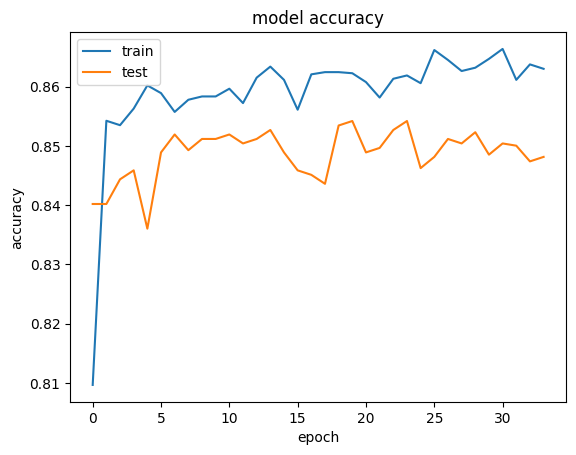

In [57]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plot for loss

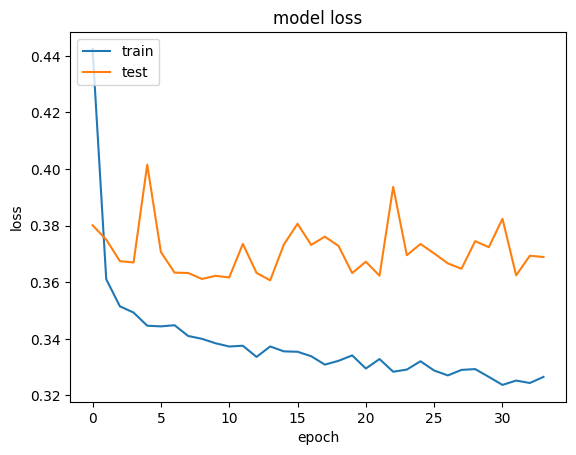

In [58]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

prediction for test data

In [59]:
y_pred=classifier(X_test)
y_pred=(y_pred>=0.5)

In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1565,   30],
       [ 245,  160]])

calculating accuracy

In [61]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8625

weights information  and store in pickle



In [62]:
classifier.get_weights()

[array([[-0.0878114 ,  1.1119616 ,  0.6002941 ,  0.14168672,  0.06647886,
         -0.22272497,  1.4223822 , -0.14168157,  0.20757528,  0.07446949,
          0.17206277],
        [-0.02408342, -0.45928648,  0.6513844 , -2.2885303 ,  1.9924706 ,
         -2.8550265 , -3.7333038 ,  2.6320462 , -0.72013235,  2.3532596 ,
         -0.12332982],
        [-0.1781658 , -0.9318445 , -0.04189888,  1.1203593 , -0.15963107,
         -0.20681378, -0.5032306 , -1.3158383 , -0.49708962,  0.02533123,
          0.17002888],
        [-3.0706043 ,  0.38537553, -1.186312  , -2.5292094 ,  0.47611645,
          0.03737488,  1.8217725 ,  1.8264711 , -0.99174005, -0.809144  ,
          0.44792497],
        [-3.7578735 ,  0.24263023,  0.29882747, -0.42042905, -2.525399  ,
          0.7719567 ,  0.1741002 ,  1.8992953 , -0.1395177 , -0.24689183,
          3.6074364 ],
        [-0.05151667,  0.14093162, -0.27427456, -0.6718476 , -0.85972226,
         -0.6407301 ,  0.04564889,  0.45754752, -1.1022767 , -0.2645899